In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GitHub/ERA-V1/Assignments/S7

Mounted at /content/drive
/content/drive/MyDrive/GitHub/ERA-V1/Assignments/S7


# Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations



In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The model

In [ ]:
from model import Model4 as Net
model = Net()

# Model Params

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 11, 26, 26]              99
       BatchNorm2d-2           [-1, 11, 26, 26]              22
              ReLU-3           [-1, 11, 26, 26]               0
           Dropout-4           [-1, 11, 26, 26]               0
            Conv2d-5           [-1, 11, 24, 24]           1,089
       BatchNorm2d-6           [-1, 11, 24, 24]              22
              ReLU-7           [-1, 11, 24, 24]               0
           Dropout-8           [-1, 11, 24, 24]               0
         MaxPool2d-9           [-1, 11, 12, 12]               0
           Conv2d-10           [-1, 14, 10, 10]           1,386
      BatchNorm2d-11           [-1, 14, 10, 10]              28
             ReLU-12           [-1, 14, 10, 10]               0

# Training and Testing



In [ ]:
from utils import train, test, plot_graph

# Let's Train and test our model

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Loss=0.0916 Batch_id=468 Accuracy=88.65: 100%|██████████| 469/469 [00:21<00:00, 22.07it/s]


Test set: Average loss: 0.0007, Accuracy: 9784/10000 (97.84%)

Epoch 2


Train: Loss=0.0165 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:17<00:00, 26.62it/s]


Test set: Average loss: 0.0003, Accuracy: 9882/10000 (98.82%)

Epoch 3


Train: Loss=0.1043 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:17<00:00, 27.16it/s]


Test set: Average loss: 0.0003, Accuracy: 9908/10000 (99.08%)

Epoch 4


Train: Loss=0.0759 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:18<00:00, 25.32it/s]


Test set: Average loss: 0.0003, Accuracy: 9905/10000 (99.05%)

Epoch 5


Train: Loss=0.1240 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:17<00:00, 26.90it/s]


Test set: Average loss: 0.0002, Accuracy: 9913/10000 (99.13%)

Epoch 6


Train: Loss=0.0807 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:17<00:00, 26.11it/s]


Test set: Average loss: 0.0003, Accuracy: 9910/10000 (99.10%)

Epoch 7


Train: Loss=0.0105 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:18<00:00, 25.96it/s]


Test set: Average loss: 0.0002, Accuracy: 9921/10000 (99.21%)

Epoch 8


Train: Loss=0.0173 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:17<00:00, 26.76it/s]


Test set: Average loss: 0.0002, Accuracy: 9928/10000 (99.28%)

Epoch 9


Train: Loss=0.0185 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:18<00:00, 25.89it/s]


Test set: Average loss: 0.0002, Accuracy: 9916/10000 (99.16%)

Epoch 10


Train: Loss=0.0116 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:19<00:00, 24.22it/s]


Test set: Average loss: 0.0002, Accuracy: 9924/10000 (99.24%)

Epoch 11


Train: Loss=0.0036 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:17<00:00, 26.67it/s]


Test set: Average loss: 0.0002, Accuracy: 9932/10000 (99.32%)

Epoch 12


Train: Loss=0.0278 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:18<00:00, 25.88it/s]


Test set: Average loss: 0.0002, Accuracy: 9934/10000 (99.34%)

Epoch 13


Train: Loss=0.0150 Batch_id=468 Accuracy=99.43: 100%|██████████| 469/469 [00:17<00:00, 26.37it/s]


Test set: Average loss: 0.0002, Accuracy: 9916/10000 (99.16%)

Epoch 14


Train: Loss=0.0053 Batch_id=468 Accuracy=99.56: 100%|██████████| 469/469 [00:18<00:00, 25.47it/s]


Test set: Average loss: 0.0002, Accuracy: 9938/10000 (99.38%)

Epoch 15


Train: Loss=0.0669 Batch_id=468 Accuracy=99.51: 100%|██████████| 469/469 [00:17<00:00, 26.67it/s]


Test set: Average loss: 0.0002, Accuracy: 9926/10000 (99.26%)



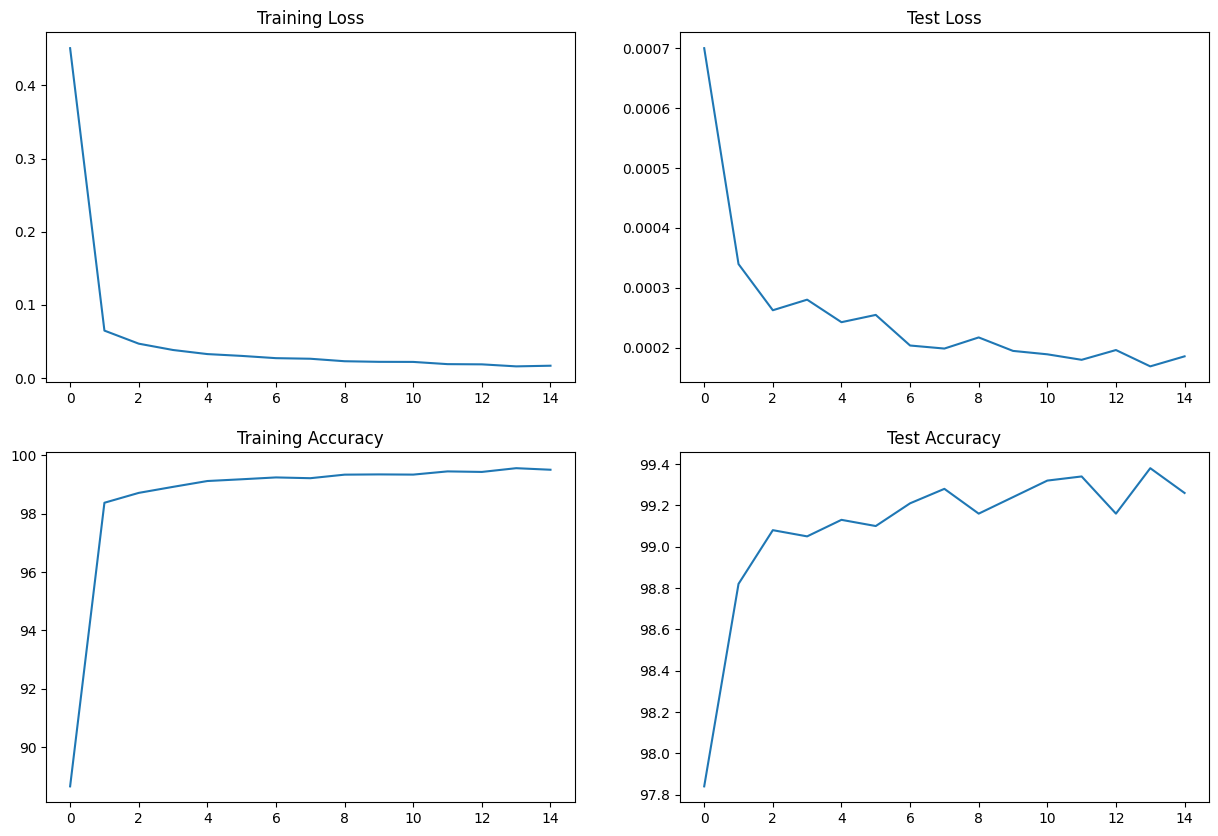

In [ ]:
plot_graph()

## Model 4

### Target
* Add Regularization, Dropout

### Results:
* Parameters: 6,646
* Best Train Accuracy: 99.56
* Best Test Accuracy: 99.38

### Analysis:
* Regularization working. The difference between train and test accuracy is reduced.
* Seeing image samples, we can add slight rotation.